In [1]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

from tqdm import tqdm

In [3]:
#Getting the data from csv file and separating labels from it then applying normalization.

X_train = np.array(pd.read_csv('Datasets/emnist-byclass-train.csv', header=None).loc[:, 1:]) / 255.0
y_train = np.array(pd.read_csv('Datasets/emnist-byclass-train.csv', header=None).loc[:, 0])

X_test = np.array(pd.read_csv('Datasets/emnist-byclass-test.csv', header=None).loc[:, 1:]) / 255.0
y_test = np.array(pd.read_csv('Datasets/emnist-byclass-test.csv', header=None).loc[:, 0])

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(697932, 784) (697932,) (116323, 784) (116323,)


In [16]:
#Making every image to 28*28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

36


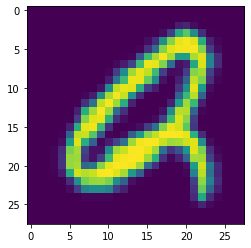

In [17]:
plt.imshow(X_train[1])
print(y_train[1])

In [11]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(697932, 28, 28) (697932,) (116323, 28, 28) (116323,)


In [18]:
#Rotating the data

k = len(X_train)
for t in range(k):
    X_train[t]=np.transpose(X_train[t])

k = len(X_test)
for t in range(k):
    X_test[t]=np.transpose(X_test[t])

36


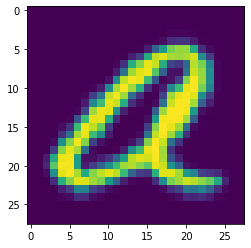

In [19]:
plt.imshow(X_train[1])
print(y_train[1])

In [20]:
#flattening the data to send it to first layer of NN
X_train_flat = X_train.reshape(X_train.shape[0], 784,1)
X_test_flat = X_test.reshape(X_test.shape[0], 784,1)

In [9]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = X_train_flat.astype('float32')
test_images = X_test_flat.astype('float32')

train_images = resh(train_images)
test_images = resh(test_images)


train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)

K.set_learning_phase(1)
model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))

model.add(Convolution2D(32, (5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

opt = tf.keras.optimizers.Adadelta()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
print(model.summary())
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 62)               

2021-11-22 22:46:37.484163: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 22:46:37.506849: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-11-22 22:46:38.041204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5453/5453 [==============================] - ETA: 0s - loss: 3.5284 - accuracy: 0.2157

2021-11-22 22:47:51.092756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5453/5453 [==============================] - 80s 14ms/step - loss: 3.5284 - accuracy: 0.2157 - val_loss: 2.8604 - val_accuracy: 0.4275
Epoch 2/20
5453/5453 [==============================] - 80s 15ms/step - loss: 2.5795 - accuracy: 0.4162 - val_loss: 2.1075 - val_accuracy: 0.5210
Epoch 3/20
5453/5453 [==============================] - 82s 15ms/step - loss: 2.0885 - accuracy: 0.4999 - val_loss: 1.7558 - val_accuracy: 0.5779
Epoch 4/20
5453/5453 [==============================] - 81s 15ms/step - loss: 1.8413 - accuracy: 0.5427 - val_loss: 1.5612 - val_accuracy: 0.6104
Epoch 5/20
5453/5453 [==============================] - 89s 16ms/step - loss: 1.6905 - accuracy: 0.5693 - val_loss: 1.4335 - val_accuracy: 0.6306
Epoch 6/20
5453/5453 [==============================] - 125s 23ms/step - loss: 1.5842 - accuracy: 0.5879 - val_loss: 1.3421 - val_accuracy: 0.6457
Epoch 7/20
5453/5453 [==============================] - 93s 17ms/step - loss: 1.5028 - accuracy: 0.6036 - val_loss: 1.2707 - val_accur

In [11]:
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

Accuracy: 74.00%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


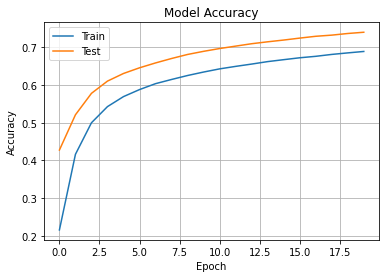

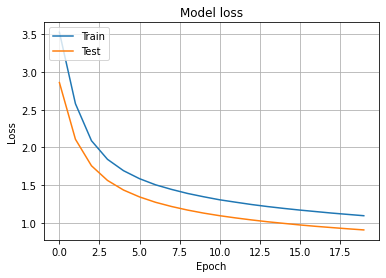

In [12]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

In [13]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("models/modeladadelta.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("models/modeladadelta.h5")